# Students Performance in Exams

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df["gender"].unique()

array(['female', 'male'], dtype=object)

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Hence, there is no null values is the dataset.

In [7]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

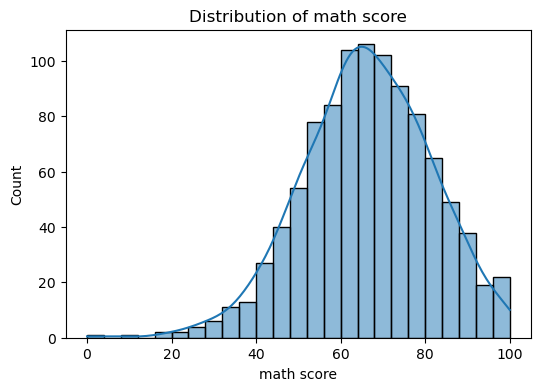

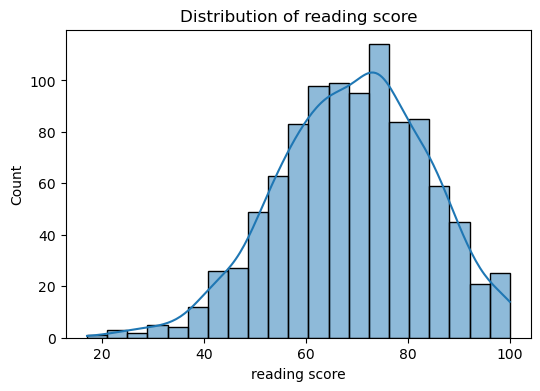

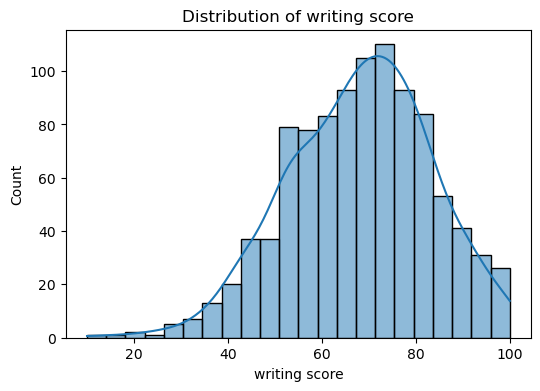

In [9]:
numeric_cols = ['math score', 'reading score', 'writing score']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


C:\Users\nips2\AppData\Local\Temp\ipykernel_29716\1025312112.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="parental level of education", y="math score", data=df, ci=None)


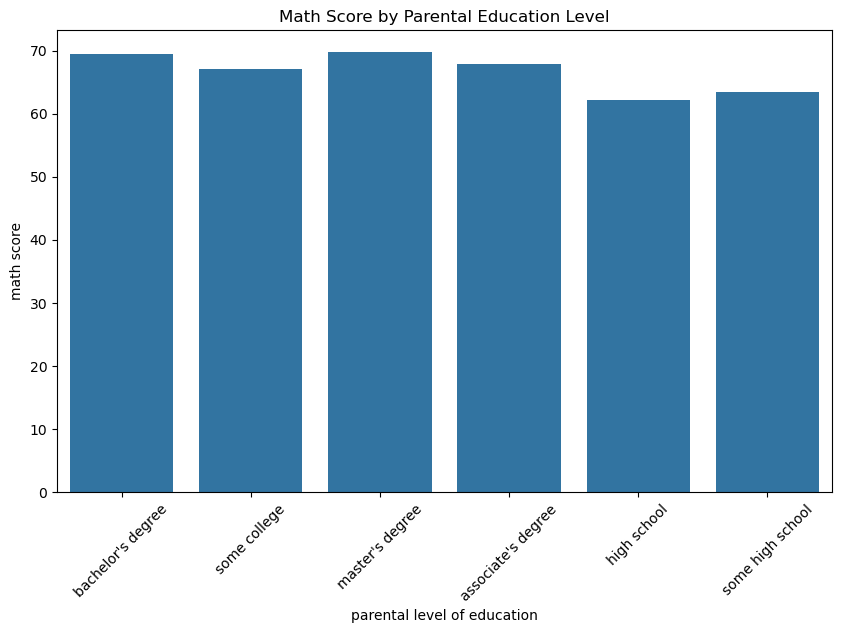

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x="parental level of education", y="math score", data=df, ci=None)
plt.xticks(rotation=45)
plt.title("Math Score by Parental Education Level")
plt.show()


C:\Users\nips2\AppData\Local\Temp\ipykernel_29716\274239893.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gender", y=col, data=df, palette="Set2")
C:\Users\nips2\AppData\Local\Temp\ipykernel_29716\274239893.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gender", y=col, data=df, palette="Set2")
C:\Users\nips2\AppData\Local\Temp\ipykernel_29716\274239893.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gender", y=col, data=df, palette="Set2")


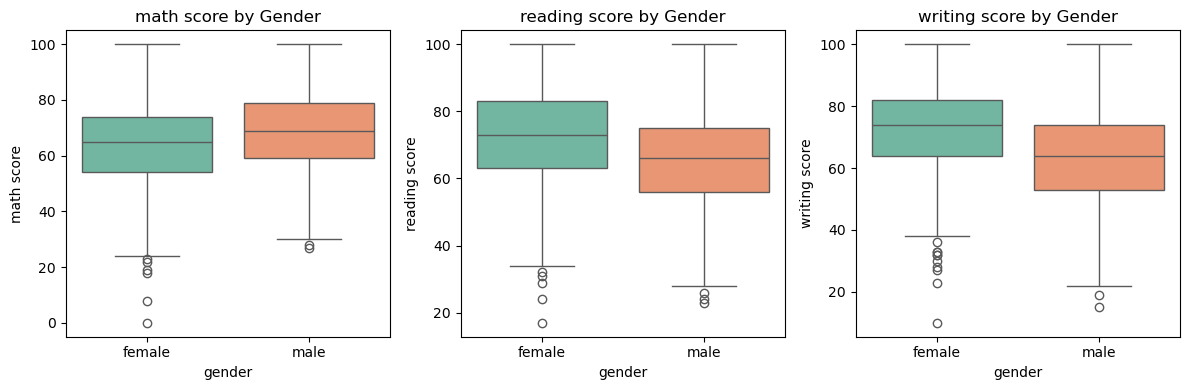

In [11]:
plt.figure(figsize=(12,4))
for i, col in enumerate(["math score", "reading score", "writing score"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(x="gender", y=col, data=df, palette="Set2")
    plt.title(f"{col} by Gender")
plt.tight_layout()
plt.show()


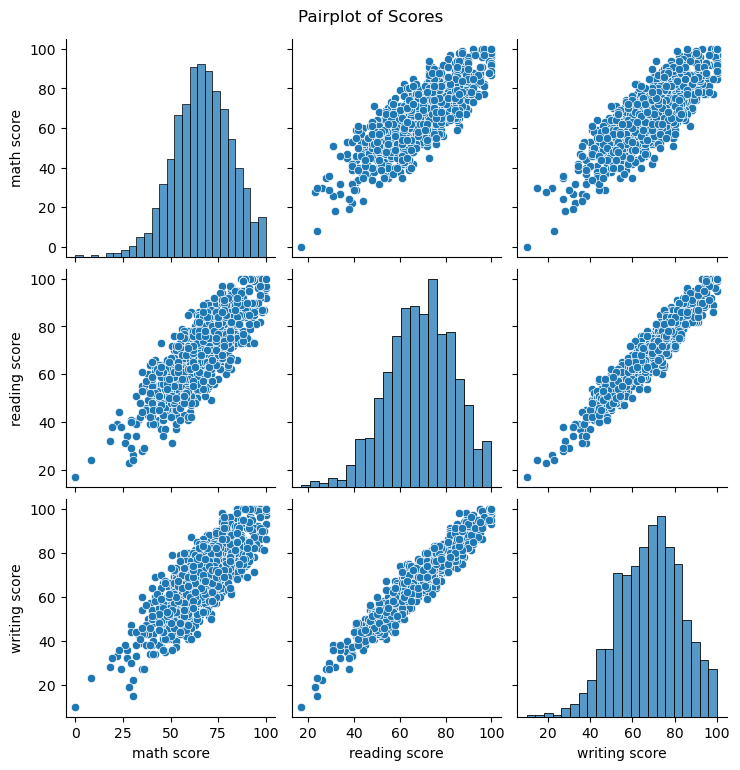

In [12]:
sns.pairplot(df[["math score", "reading score", "writing score"]])
plt.suptitle("Pairplot of Scores", y=1.02)
plt.show()


Here we can see, our datapoints are linear aligned so we can use linear regression.

In [13]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
# Create average score column
df["avg_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [15]:
df_ml = df.copy()
cat_cols = df_ml.select_dtypes(include="object").columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df_ml[col] = le.fit_transform(df_ml[col])

df_ml.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,0,1,1,1,1,72,72,74,72.666667
1,0,2,4,1,0,69,90,88,82.333333
2,0,1,3,1,1,90,95,93,92.666667
3,1,0,0,0,1,47,57,44,49.333333
4,1,2,4,1,1,76,78,75,76.333333


In [16]:
X = df_ml.drop(["avg_score"], axis=1)
y = df_ml["avg_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
model1 = lr.fit(X_train, y_train)

In [33]:
y_pred = model1.predict(X_test)

In [34]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

For regression, we use:

R² Score (how well predictions fit actual values)

RMSE (error size)

MAE (absolute error)

In [35]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)


R2 Score: 1.0
RMSE: 1.1116077194488138e-14
MAE: 8.242295734817162e-15


model2

In [39]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [40]:
model2 = dt.fit(X_train, y_train)

In [38]:
y_pred2 = model2.predict(X_test)

In [42]:
r2 = r2_score(y_test, y_pred2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
mae = mean_absolute_error(y_test, y_pred2)

print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)


R2 Score: 0.9884543562996531
RMSE: 1.5732132722552272
MAE: 1.0949999999999998


In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [44]:
model3 = dt.fit(X_train, y_train)

In [46]:
y_pred3 = model3.predict(X_test)

In [47]:
r2 = r2_score(y_test, y_pred3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))
mae = mean_absolute_error(y_test, y_pred3)

print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)


R2 Score: 0.987910117202667
RMSE: 1.6098654188057666
MAE: 1.0816666666666668


In [48]:
from sklearn.svm import SVR

In [49]:
sr = SVR()

In [50]:
model4 = sr.fit(X_train, y_train)

In [51]:
y_pred4 = model4.predict(X_test)

In [52]:
r2 = r2_score(y_test, y_pred4)
rmse = np.sqrt(mean_squared_error(y_test, y_pred4))
mae = mean_absolute_error(y_test, y_pred4)

print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)


R2 Score: 0.9579479545991321
RMSE: 3.002424452654029
MAE: 0.8741305778619638


In [53]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Support Vector Regressor": SVR()
}


In [54]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append([name, r2, rmse])

results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "RMSE"])
print(results_df)


                      Model  R2 Score          RMSE
0         Linear Regression  1.000000  1.111608e-14
1             Decision Tree  0.987275  1.651599e+00
2             Random Forest  0.994006  1.133578e+00
3  Support Vector Regressor  0.957948  3.002424e+00


R² score closer to 1 is better.

Lower MAE and RMSE means better predictions.

Hence we can see our linear model is working best in this case so we will keep our linear model as final model.

In [55]:
import pickle

In [56]:
with open("linear_model.pkl", "wb") as file:
    pickle.dump(model1, file)

In [57]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [58]:
# Create a dictionary to store fitted encoders
encoders = {}

# Fit LabelEncoder on each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Transform dataset
    encoders[col] = le  # Save the fitted encoder

# Save all encoders into a pickle file
with open("categorical_encoders.pkl", "wb") as file:
    pickle.dump(encoders, file)